## Objet

L'objet est de voir si on peut prévoir la consommation ou la pollution à partir de quelques descriptions d'un véhicule. On utilise les données disponibles sur le site de [opendata du gouvernement](https://www.data.gouv.fr/en/datasets/emissions-de-co2-et-de-polluants-des-vehicules-commercialises-en-france/).

Charger les données de `mars-2014-complete.csv` (Avec `pandas`, utiliser le moteur `python` plutôt que `C`). Regardez également le dictionnaire des variables.

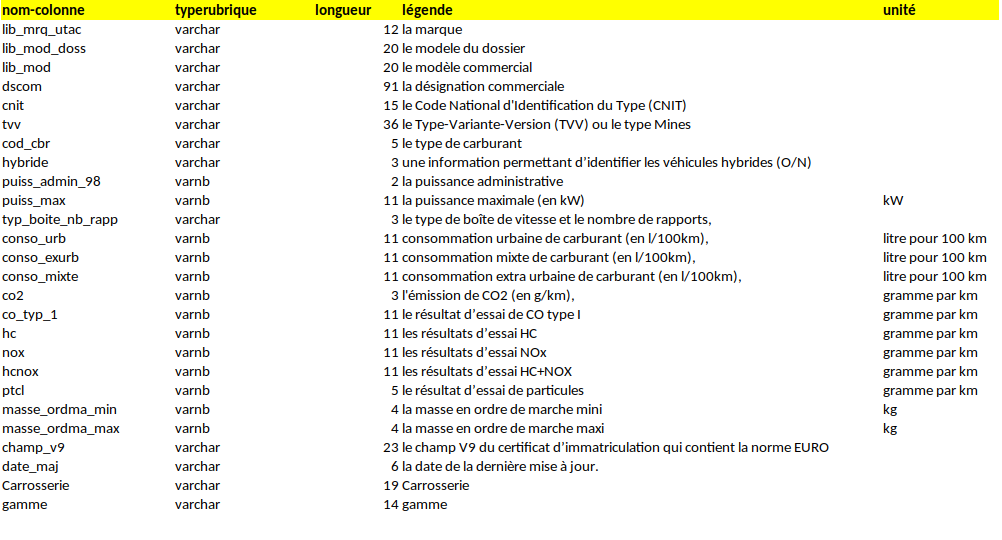

## Moyens

Pour la manipulation des données, je vous recommande d'utiliser `pandas`. C'est la librairie la plus simple pour charger des données, les modifier, les interroger. La documentation est accessible depuis le menu aide des notebooks.

Les méthodes `isna`, `notna`, `drop`, `dropna`, `describe` (regardez le paramètre `include`), `value_counts`, `dtypes`, `astype`  vous seront utiles.  
L'attribut `str` des champs texte permet d'appliquer des opérations textuelles comme `extract` ou réaliser des slices des chaînes de caractères. 

Je vous conseille le rapide survol des des 2 premiers liens et éventuellement le 3eme si nécessaire. 
- [10 mins avec pandas](https://pandas.pydata.org/docs/user_guide/10min.html)
- [Les bases de pandas](https://pandas.pydata.org/docs/user_guide/basics.html)
- [Les 4 premiers notebooks de Jake VandenPlas sur pandas](https://github.com/jakevdp/PythonDataScienceHandbook/blob/8a34a4f653bdbdc01415a94dc20d4e9b97438965/notebooks/03.00-Introduction-to-Pandas.ipynb)

## Quelques indications 

Ajouter les cellules pour réaliser au moins toutes les opérations se trouvant dans cette liste

- Vérifier si des colonnes sont vides et les supprimer si nécessaire
- Regarder si les attributs sont discrets continus, s'ils contiennent des valeurs manquantes
- Pour les attributs discrets, savoir combien de valeurs différentes sont présentes et en déduire si les champs sont nécessaires ou non
- Séparer les attributs en plusieurs sous-listes:
   - Ceux qui indiquent une consommation
   - Ceux qui indiquent la pollution
   - Ceux qui sont des libellés 
   - Les autres (nommés attributs standards, attributs qu'on conserve dans la description d'une voiture ensuite dans les phases d'apprentissage)
- Créer des champs additionnels qu'on ajoute aux attributs standards
   - Le nombre de chevaux indiqué dans la désignation commerciale entre parenthèses
   - Le type de boîte de vitesse
   - Le nombre de vitesses (ou rapports) (on r
    emplace le '.' par '0'), convertir cette colonne en 'int64'  
- Vérifier si les colonnes des attributs standards n'ont pas trop de valeurs manquantes (NaN), sinon les virer.
- Vous devez expliquer comment vous avez procédé, montrer des statistiques qui vous ont permis de faire vos choix, tracer des diagrammes si besoin (correlations, histogrammes, répartitions,...)


## Dans sklearn

- Votre ensemble de données sera décrit par les attributs standards.
- Pour certaines méthodes vous allez utilisez transformer les attributs discrets en numérique par du one-hot-encoding (voir dans preprocessing, `OneHotEncoder` ou dans pandas `get_dummies`)
- Vous devez appliquer et comparer plusieurs méthodes pour prédire la consommation mixte, et l'émission de CO2. 
- Vous pouvez aussi construire des problèmes de classification en prédisant par exemple les modèles qui consomment plus que la moyenne.
- Libre à vous de définir des problèmes de prédiction qui soient intéressants!
- Vous devez aussi appliquer des méthodes d'ensemble, des votes de classifieurs dans vos comparaisons.
- Vous devez régler des hyperparamètres et afficher des courbes d'apprentissage
- Vous **illustrez et commentez vos résultats**. 
- Vous pouvez également utiliser des méthodes de clustering sur ces attributs et regarder si les résultats obtenus peuvent être interprétés. 

In [1]:
import pandas as pd
import numpy as np
# On convertit le fichie csv en dataframe.
df = pd.read_csv('mars-2014-complete.csv',sep=';',engine='python')

In [2]:
df

,lib_mrq,lib_mod_doss,lib_mod,dscom,cnit,tvv,cod_cbr,hybride,puiss_admin_98,puiss_max,...,masse_ordma_min,masse_ordma_max,champ_v9,date_maj,Carrosserie,gamme,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29
0,ALFA-ROMEO,159,159,159 1750 Tbi (200ch),M10ALFVP000G340,939AXN1B52C,ES,non,12,147,...,1505,1505,715/2007*692/2008EURO5,mars-14,BERLINE,MOY-SUPER,NaN,NaN,NaN,NaN
1,ALFA-ROMEO,159,159,159 1750 Tbi (200ch),M10ALFVP000H341,939BXN1B53C,ES,non,12,147,...,1555,1555,715/2007*692/2008EURO5,mars-14,BERLINE,MOY-SUPER,NaN,NaN,NaN,NaN
2,ALFA-ROMEO,159,159,159 2.0 JTDm (136ch),M10ALFVP000E302,939AXR1B64,GO,non,7,100,...,1565,1565,715/2007*692/2008EURO5,mars-14,BERLINE,MOY-SUPER,NaN,NaN,NaN,NaN
3,ALFA-ROMEO,159,159,159 2.0 JTDm (136ch),M10ALFVP000F303,939AXR1B64B,GO,non,7,100,...,1565,1565,715/2007*692/2008EURO5,mars-14,BERLINE,MOY-SUPER,NaN,NaN,NaN,NaN
4,ALFA-ROMEO,159,159,159 2.0 JTDm (170ch),M10ALFVP000G304,939AXS1B66,GO,non,9,125,...,1565,1565,715/2007*692/2008EURO5,mars-14,BERLINE,MOY-SUPER,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55039,VOLVO,XC70,XC70,XC70 D4 4cyl (181ch) Stop&Start Geartronic 8,M10VLVVP900U606,BZ73CD,GO,non,10,133,...,1755,1755,715/2007*195/2013EURO6,mars-14,BREAK,SUPERIEURE,NaN,NaN,NaN,NaN
55040,VOLVO,XC70,XC70,XC70 D4 5cyl (181ch) AWD Geartronic 6,M10VLVVP900V607,BZ8156,GO,non,11,133,...,1799,1799,715/2007*630/2012EURO5,mars-14,BREAK,SUPERIEURE,NaN,NaN,NaN,NaN
55041,VOLVO,XC70,XC70,XC70 D5 (215ch) AWD Geartronic 6,M10VLVVP872R581,BZ8256,GO,non,13,158,...,1798,1798,715/2007*630/2012EURO5,mars-14,BREAK,SUPERIEURE,NaN,NaN,NaN,NaN
55042,VOLVO,XC70,XC70,XC70 D5 (215ch) Stop&Start AWD BVM6,M10VLVVP8723582,BZ83A4,GO,non,12,158,...,1788,1788,715/2007*630/2012EURO5,mars-14,BREAK,SUPERIEURE,NaN,NaN,NaN,NaN


In [3]:
# On retire les valeurs manquantes.
df.dropna(how='all')

,lib_mrq,lib_mod_doss,lib_mod,dscom,cnit,tvv,cod_cbr,hybride,puiss_admin_98,puiss_max,...,masse_ordma_min,masse_ordma_max,champ_v9,date_maj,Carrosserie,gamme,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29
0,ALFA-ROMEO,159,159,159 1750 Tbi (200ch),M10ALFVP000G340,939AXN1B52C,ES,non,12,147,...,1505,1505,715/2007*692/2008EURO5,mars-14,BERLINE,MOY-SUPER,NaN,NaN,NaN,NaN
1,ALFA-ROMEO,159,159,159 1750 Tbi (200ch),M10ALFVP000H341,939BXN1B53C,ES,non,12,147,...,1555,1555,715/2007*692/2008EURO5,mars-14,BERLINE,MOY-SUPER,NaN,NaN,NaN,NaN
2,ALFA-ROMEO,159,159,159 2.0 JTDm (136ch),M10ALFVP000E302,939AXR1B64,GO,non,7,100,...,1565,1565,715/2007*692/2008EURO5,mars-14,BERLINE,MOY-SUPER,NaN,NaN,NaN,NaN
3,ALFA-ROMEO,159,159,159 2.0 JTDm (136ch),M10ALFVP000F303,939AXR1B64B,GO,non,7,100,...,1565,1565,715/2007*692/2008EURO5,mars-14,BERLINE,MOY-SUPER,NaN,NaN,NaN,NaN
4,ALFA-ROMEO,159,159,159 2.0 JTDm (170ch),M10ALFVP000G304,939AXS1B66,GO,non,9,125,...,1565,1565,715/2007*692/2008EURO5,mars-14,BERLINE,MOY-SUPER,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55039,VOLVO,XC70,XC70,XC70 D4 4cyl (181ch) Stop&Start Geartronic 8,M10VLVVP900U606,BZ73CD,GO,non,10,133,...,1755,1755,715/2007*195/2013EURO6,mars-14,BREAK,SUPERIEURE,NaN,NaN,NaN,NaN
55040,VOLVO,XC70,XC70,XC70 D4 5cyl (181ch) AWD Geartronic 6,M10VLVVP900V607,BZ8156,GO,non,11,133,...,1799,1799,715/2007*630/2012EURO5,mars-14,BREAK,SUPERIEURE,NaN,NaN,NaN,NaN
55041,VOLVO,XC70,XC70,XC70 D5 (215ch) AWD Geartronic 6,M10VLVVP872R581,BZ8256,GO,non,13,158,...,1798,1798,715/2007*630/2012EURO5,mars-14,BREAK,SUPERIEURE,NaN,NaN,NaN,NaN
55042,VOLVO,XC70,XC70,XC70 D5 (215ch) Stop&Start AWD BVM6,M10VLVVP8723582,BZ83A4,GO,non,12,158,...,1788,1788,715/2007*630/2012EURO5,mars-14,BREAK,SUPERIEURE,NaN,NaN,NaN,NaN


In [4]:
# On détecte les valeurs manquantes.
pd.isna(df)

,lib_mrq,lib_mod_doss,lib_mod,dscom,cnit,tvv,cod_cbr,hybride,puiss_admin_98,puiss_max,...,masse_ordma_min,masse_ordma_max,champ_v9,date_maj,Carrosserie,gamme,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55039,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,True
55040,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,True
55041,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,True
55042,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,True


In [5]:
# On a remarqué que les quatre dernières colonnes étaient vides, on les supprime alors.

df = df.dropna(axis='columns', how='all')

In [6]:
# On affiche les informations du DataFrame pour vérifier les types et également repérer les colonnes 
# qui ont beaucoup de valeurs manquantes.

df.info()


# On remarque que les colonnes hc et date_maj ont beaucoup de valeurs manquantes. 
# Nous allons vérifier si elles sont intéressantes à supprimer.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55044 entries, 0 to 55043
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   lib_mrq            55044 non-null  object 
 1   lib_mod_doss       55044 non-null  object 
 2   lib_mod            55044 non-null  object 
 3   dscom              55044 non-null  object 
 4   cnit               55044 non-null  object 
 5   tvv                55044 non-null  object 
 6   cod_cbr            55044 non-null  object 
 7   hybride            55044 non-null  object 
 8   puiss_admin_98     55044 non-null  int64  
 9   puiss_max          55044 non-null  object 
 10  typ_boite_nb_rapp  55044 non-null  object 
 11  conso_urb          55001 non-null  object 
 12  conso_exurb        55001 non-null  object 
 13  conso_mixte        55010 non-null  object 
 14  co2                55010 non-null  float64
 15  co_typ_1           54886 non-null  object 
 16  hc                 977

In [7]:
df['hc']

0        0,052000001
1        0,052000001
2                NaN
3                NaN
4                NaN
            ...     
55039            NaN
55040            NaN
55041            NaN
55042            NaN
55043    0,037999999
Name: hc, Length: 55044, dtype: object

In [8]:
df.hc.value_counts()

0,008          2732
0,030999999    1195
0,014           914
0               580
0,041000001     276
               ... 
0,083999999       2
0,017000001       1
0,004             1
0,009             1
0,50999999        1
Name: hc, Length: 74, dtype: int64

In [9]:
# On décide de supprimer la colonne hc qui a beaucoup de valeurs manquantes.

df = df.drop(columns=['hc'])

In [10]:
# La colonne date_maj n'est pas intéressante, elle n'influe en rien sur les autres paramètres.

df = df.drop(columns=['date_maj'])

In [11]:
df['hcnox']

# La colonne hcnox présente les résultats d'essai de HC + NOX 
# or nous avons vu que HC n'a pas assez de valeurs pour être utilisé.
# De plus, la colonne nox détient les mêmes informations, on peut donc supprimer cette colonne.

0                NaN
1                NaN
2        0,174999997
3        0,174999997
4        0,193000004
            ...     
55039    0,064999998
55040    0,151999995
55041    0,151999995
55042    0,143999994
55043            NaN
Name: hcnox, Length: 55044, dtype: object

In [12]:
df = df.drop(columns=['hcnox'])

In [13]:
# On regarde si les attributs sont discrets continus

df.nunique()

lib_mrq                 46
lib_mod_doss           483
lib_mod                434
dscom                 3837
cnit                 54982
tvv                  35430
cod_cbr                 13
hybride                  2
puiss_admin_98          67
puiss_max              232
typ_boite_nb_rapp       19
conso_urb              198
conso_exurb             89
conso_mixte            137
co2                    259
co_typ_1               606
nox                    222
ptcl                     9
masse_ordma_min        846
masse_ordma_max        914
champ_v9                35
Carrosserie             11
gamme                    7
dtype: int64

In [14]:
# On supprime les colonnes cnit et tvv car elles contiennent trop de valeurs différentes
df= df.drop(columns=['cnit','tvv'])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55044 entries, 0 to 55043
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   lib_mrq            55044 non-null  object 
 1   lib_mod_doss       55044 non-null  object 
 2   lib_mod            55044 non-null  object 
 3   dscom              55044 non-null  object 
 4   cod_cbr            55044 non-null  object 
 5   hybride            55044 non-null  object 
 6   puiss_admin_98     55044 non-null  int64  
 7   puiss_max          55044 non-null  object 
 8   typ_boite_nb_rapp  55044 non-null  object 
 9   conso_urb          55001 non-null  object 
 10  conso_exurb        55001 non-null  object 
 11  conso_mixte        55010 non-null  object 
 12  co2                55010 non-null  float64
 13  co_typ_1           54886 non-null  object 
 14  nox                54886 non-null  object 
 15  ptcl               52366 non-null  object 
 16  masse_ordma_min    550

In [16]:
# Nous remarquons qu'il reste de valeurs manquantes mais qu'elles sont négligeables par rapport à la taille
# de la base de données. Nous pouvons donc supprimer toutes les lignes ayant une valeur manquante.
df.dropna(inplace=True)

In [17]:
df.info()
# Il faudra par la suite changer le type de nos colonnes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52362 entries, 0 to 55042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   lib_mrq            52362 non-null  object 
 1   lib_mod_doss       52362 non-null  object 
 2   lib_mod            52362 non-null  object 
 3   dscom              52362 non-null  object 
 4   cod_cbr            52362 non-null  object 
 5   hybride            52362 non-null  object 
 6   puiss_admin_98     52362 non-null  int64  
 7   puiss_max          52362 non-null  object 
 8   typ_boite_nb_rapp  52362 non-null  object 
 9   conso_urb          52362 non-null  object 
 10  conso_exurb        52362 non-null  object 
 11  conso_mixte        52362 non-null  object 
 12  co2                52362 non-null  float64
 13  co_typ_1           52362 non-null  object 
 14  nox                52362 non-null  object 
 15  ptcl               52362 non-null  object 
 16  masse_ordma_min    523

In [18]:
# On créé des champs additionnels qu'on ajoute aux attributs standards
nombre_chevaux=df.dscom.str.extract(r'^.*?\([^\d]*(\d+)[^\d]*\).*$')
df['nombre_chevaux']=nombre_chevaux


In [19]:
df['typ_boite_nb_rapp'] = df['typ_boite_nb_rapp'].replace(['V .'],'V 0')

In [20]:
type_boite= df.typ_boite_nb_rapp.str.extract(r'([A-Z])')
df['type_boite']=type_boite


In [21]:
nombre_vitesse= df.typ_boite_nb_rapp.str.extract(r'([0-9])').astype(np.int64)
df['nombre_vitesse']=nombre_vitesse

In [22]:
nb_rapp = df.typ_boite_nb_rapp.str.extract(r'([1-9])')
nb_rapp
df['nb_rapp']= nb_rapp

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52362 entries, 0 to 55042
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   lib_mrq            52362 non-null  object 
 1   lib_mod_doss       52362 non-null  object 
 2   lib_mod            52362 non-null  object 
 3   dscom              52362 non-null  object 
 4   cod_cbr            52362 non-null  object 
 5   hybride            52362 non-null  object 
 6   puiss_admin_98     52362 non-null  int64  
 7   puiss_max          52362 non-null  object 
 8   typ_boite_nb_rapp  52362 non-null  object 
 9   conso_urb          52362 non-null  object 
 10  conso_exurb        52362 non-null  object 
 11  conso_mixte        52362 non-null  object 
 12  co2                52362 non-null  float64
 13  co_typ_1           52362 non-null  object 
 14  nox                52362 non-null  object 
 15  ptcl               52362 non-null  object 
 16  masse_ordma_min    523

In [24]:
df.nunique()

lib_mrq                41
lib_mod_doss          384
lib_mod               356
dscom                3122
cod_cbr                 7
hybride                 2
puiss_admin_98         55
puiss_max             160
typ_boite_nb_rapp      13
conso_urb             163
conso_exurb            80
conso_mixte           108
co2                   210
co_typ_1              483
nox                   221
ptcl                    9
masse_ordma_min       733
masse_ordma_max       774
champ_v9               34
Carrosserie            11
gamme                   7
nombre_chevaux        104
type_boite              5
nombre_vitesse          6
nb_rapp                 5
dtype: int64

In [25]:
# La colonne nb_chevaux ne contient pas assez de valeurs.
# La colonne typ_boite_nb_rapp est inutile à garder puisque les mêmes valeurs se trouvent dans type_boite et nb_rapport.
# La colonne dscom a trop de valeurs différentes.

df = df.drop(columns = ['nombre_chevaux', 'typ_boite_nb_rapp', 'dscom'])

In [26]:
# On retire les valeurs manquantes
df = df.dropna()

In [27]:
# Comme nous l'avons dis précédemment, il faut désormais convertir les types des colonnes en int ou float.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52168 entries, 0 to 55042
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   lib_mrq          52168 non-null  object 
 1   lib_mod_doss     52168 non-null  object 
 2   lib_mod          52168 non-null  object 
 3   cod_cbr          52168 non-null  object 
 4   hybride          52168 non-null  object 
 5   puiss_admin_98   52168 non-null  int64  
 6   puiss_max        52168 non-null  object 
 7   conso_urb        52168 non-null  object 
 8   conso_exurb      52168 non-null  object 
 9   conso_mixte      52168 non-null  object 
 10  co2              52168 non-null  float64
 11  co_typ_1         52168 non-null  object 
 12  nox              52168 non-null  object 
 13  ptcl             52168 non-null  object 
 14  masse_ordma_min  52168 non-null  int64  
 15  masse_ordma_max  52168 non-null  int64  
 16  champ_v9         52168 non-null  object 
 17  Carrosserie 

In [28]:
labels = df['lib_mrq'].unique().tolist()
mapping = dict( zip(labels,range(len(labels))) )
df.replace({'lib_mrq': mapping},inplace=True)

In [29]:
labels = df['lib_mod_doss'].unique().tolist()
mapping = dict( zip(labels,range(len(labels))) )
df.replace({'lib_mod_doss': mapping},inplace=True)

In [30]:
labels = df['lib_mod'].unique().tolist()
mapping = dict( zip(labels,range(len(labels))) )
df.replace({'lib_mod': mapping},inplace=True)

In [31]:
labels = df['cod_cbr'].unique().tolist()
mapping = dict( zip(labels,range(len(labels))) )
df.replace({'cod_cbr': mapping},inplace=True)

In [32]:
labels = df['hybride'].unique().tolist()
mapping = dict( zip(labels,range(len(labels))) )
df.replace({'hybride': mapping},inplace=True)

In [33]:
puiss_max=df['puiss_max'].replace({',': '.'}, regex=True)
df['puiss_max']= puiss_max.astype(float)

In [34]:
conso_urb=df['conso_urb'].replace({',': '.'}, regex=True)
df['conso_urb']= conso_urb.astype(float)

In [35]:
conso_exurb=df['conso_exurb'].replace({',': '.'}, regex=True)
df['conso_exurb']= conso_exurb.astype(float)

In [36]:
conso_mixte=df['conso_mixte'].replace({',': '.'}, regex=True)
df['conso_mixte']= conso_mixte.astype(df['co2'].dtype)

In [37]:
df['conso_mixte']=df['conso_mixte'].astype(np.int64)

In [38]:
co_typ_1=df['co_typ_1'].replace({',': '.'}, regex=True)
df['co_typ_1']= co_typ_1.astype(float)

In [39]:
nox=df['nox'].replace({',': '.'}, regex=True)
df['nox']= nox.astype(float)

In [40]:
ptcl=df['ptcl'].replace({',': '.'}, regex=True)
df['ptcl']= ptcl.astype(float)

In [41]:
labels = df['champ_v9'].unique().tolist()
mapping = dict( zip(labels,range(len(labels))) )
df.replace({'champ_v9': mapping},inplace=True)

In [42]:
labels = df['Carrosserie'].unique().tolist()
mapping = dict( zip(labels,range(len(labels))) )
df.replace({'Carrosserie': mapping},inplace=True)

In [43]:
labels = df['gamme'].unique().tolist()
mapping = dict( zip(labels,range(len(labels))) )
df.replace({'gamme': mapping},inplace=True)

In [44]:
labels = df['type_boite'].unique().tolist()
mapping = dict( zip(labels,range(len(labels))) )
df.replace({'type_boite': mapping},inplace=True)

In [45]:
import numpy as np
df['nb_rapp'] = df['nb_rapp'].astype(np.int64)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52168 entries, 0 to 55042
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   lib_mrq          52168 non-null  int64  
 1   lib_mod_doss     52168 non-null  int64  
 2   lib_mod          52168 non-null  int64  
 3   cod_cbr          52168 non-null  int64  
 4   hybride          52168 non-null  int64  
 5   puiss_admin_98   52168 non-null  int64  
 6   puiss_max        52168 non-null  float64
 7   conso_urb        52168 non-null  float64
 8   conso_exurb      52168 non-null  float64
 9   conso_mixte      52168 non-null  int64  
 10  co2              52168 non-null  float64
 11  co_typ_1         52168 non-null  float64
 12  nox              52168 non-null  float64
 13  ptcl             52168 non-null  float64
 14  masse_ordma_min  52168 non-null  int64  
 15  masse_ordma_max  52168 non-null  int64  
 16  champ_v9         52168 non-null  int64  
 17  Carrosserie 

In [46]:
df.describe()

,lib_mrq,lib_mod_doss,lib_mod,cod_cbr,hybride,puiss_admin_98,puiss_max,conso_urb,conso_exurb,conso_mixte,...,nox,ptcl,masse_ordma_min,masse_ordma_max,champ_v9,Carrosserie,gamme,type_boite,nombre_vitesse,nb_rapp
count,52168.000000,52168.000000,52168.000000,52168.000000,52168.000000,52168.000000,52168.000000,52168.000000,52168.000000,52168.000000,...,52168.000000,52168.000000,52168.000000,52168.000000,52168.000000,52168.000000,52168.000000,52168.000000,52168.000000,52168.000000
mean,26.737674,255.574835,253.832234,0.952327,0.002779,10.241029,116.246722,9.404145,6.689377,7.261386,...,0.313403,0.000890,2120.124444,2369.014262,10.006192,7.968736,1.470327,0.388303,5.901932,5.901932
std,8.112850,66.894180,60.561251,0.247457,0.052648,4.223320,38.951602,1.544611,0.888762,1.124965,...,0.422835,0.000962,269.272043,398.871233,5.862759,2.680621,1.005439,0.489096,0.639830,0.639830
min,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,40.000000,0.000000,2.800000,1.000000,...,0.002000,0.000000,845.000000,845.000000,0.000000,0.000000,0.000000,0.000000,5.000000,5.000000
25%,23.000000,225.000000,235.000000,1.000000,0.000000,9.000000,100.000000,8.800000,6.500000,7.000000,...,0.197000,0.000000,2006.000000,2075.000000,7.000000,9.000000,0.000000,0.000000,6.000000,6.000000
50%,23.000000,226.000000,236.000000,1.000000,0.000000,10.000000,120.000000,9.400000,6.800000,7.000000,...,0.214000,0.001000,2076.000000,2355.000000,11.000000,9.000000,2.000000,0.000000,6.000000,6.000000
75%,39.000000,356.000000,336.000000,1.000000,0.000000,10.000000,120.000000,10.100000,7.200000,8.000000,...,0.228000,0.001000,2270.000000,2739.000000,11.000000,9.000000,2.000000,1.000000,6.000000,6.000000
max,40.000000,379.000000,355.000000,6.000000,1.000000,80.000000,585.000000,25.600000,11.800000,16.000000,...,1.846000,0.010000,2745.000000,3094.000000,33.000000,10.000000,6.000000,3.000000,9.000000,9.000000


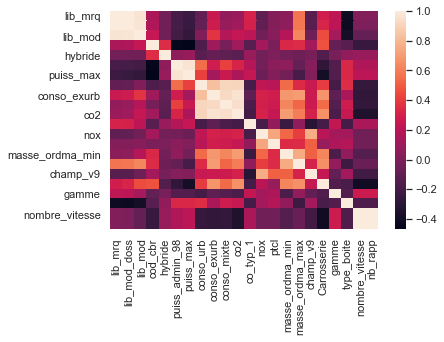

In [47]:
import seaborn as sns ; sns.set()
correlations = df.corr(method='pearson')  # matrice de correlation
sns.heatmap(correlations)
# on constate qu'il y a des valeurs qui ont une corrélation élevée 
# ils sont donc linéairement dépendants 

In [48]:
correlations

,lib_mrq,lib_mod_doss,lib_mod,cod_cbr,hybride,puiss_admin_98,puiss_max,conso_urb,conso_exurb,conso_mixte,...,nox,ptcl,masse_ordma_min,masse_ordma_max,champ_v9,Carrosserie,gamme,type_boite,nombre_vitesse,nb_rapp
lib_mrq,1.000000,0.997284,0.966618,0.152017,-0.033882,-0.189657,-0.233765,-0.098421,0.258713,0.072074,...,-0.098791,0.022065,0.045988,0.573302,-0.129910,0.288918,0.224303,-0.411002,0.019546,0.019546
lib_mod_doss,0.997284,1.000000,0.974489,0.167257,-0.036448,-0.194207,-0.242590,-0.082019,0.278131,0.089716,...,-0.094722,0.024379,0.063108,0.583902,-0.122282,0.319514,0.214346,-0.413901,-0.000109,-0.000109
lib_mod,0.966618,0.974489,1.000000,0.240772,-0.043580,-0.204518,-0.269142,0.014875,0.375066,0.188807,...,-0.040556,0.033702,0.181936,0.630605,-0.048564,0.453598,0.136249,-0.383075,-0.084172,-0.084172
cod_cbr,0.152017,0.167257,0.240772,1.000000,0.348587,-0.445377,-0.464668,-0.164452,0.117273,-0.019345,...,0.134164,-0.011230,0.331665,0.343227,0.134474,0.469833,-0.085698,-0.126753,-0.250967,-0.250967
hybride,-0.033882,-0.036448,-0.043580,0.348587,1.000000,0.063370,0.095646,-0.122836,-0.076551,-0.106451,...,-0.031558,-0.000378,-0.031039,-0.053897,-0.020550,-0.150288,-0.020351,0.067517,0.095727,0.095727
puiss_admin_98,-0.189657,-0.194207,-0.204518,-0.445377,0.063370,1.000000,0.967188,0.553434,0.279794,0.410754,...,-0.029954,0.051294,0.062308,-0.085015,0.031720,-0.276151,-0.145578,0.334898,0.173440,0.173440
puiss_max,-0.233765,-0.242590,-0.269142,-0.464668,0.095646,0.967188,1.000000,0.415657,0.128248,0.261432,...,-0.062461,0.020651,-0.031449,-0.185452,0.020413,-0.390188,-0.150702,0.335192,0.212140,0.212140
conso_urb,-0.098421,-0.082019,0.014875,-0.164452,-0.122836,0.553434,0.415657,1.000000,0.828629,0.919211,...,0.225879,0.200800,0.542745,0.340402,0.260904,0.400302,-0.199793,0.351154,-0.258709,-0.258709
conso_exurb,0.258713,0.278131,0.375066,0.117273,-0.076551,0.279794,0.128248,0.828629,1.000000,0.928102,...,0.302556,0.285353,0.688963,0.704525,0.264378,0.677557,-0.106670,0.151293,-0.271462,-0.271462
conso_mixte,0.072074,0.089716,0.188807,-0.019345,-0.106451,0.410754,0.261432,0.919211,0.928102,1.000000,...,0.294041,0.268104,0.629040,0.529796,0.265323,0.544559,-0.140553,0.276802,-0.267643,-0.267643


In [49]:
#Comme la corrélation de masse_ordma_min et masse_ordma_max et proche de 1, On décide de supprimer un des deux
df = df.drop(columns='masse_ordma_max')

In [50]:
# On sépare les attributs en plusieurs sous-liste.
df_conso = df[['conso_urb','conso_exurb','conso_mixte']]            
df_pollution = df[['co2','co_typ_1']]
df_lib= df[['lib_mrq','lib_mod_doss','lib_mod']]
df_standard= df[['cod_cbr','hybride','puiss_admin_98','puiss_max','nox','ptcl','masse_ordma_min','champ_v9','Carrosserie', 'gamme', 'type_boite', 'nb_rapp','nombre_vitesse']]

In [51]:
#la version de notre data base
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52168 entries, 0 to 55042
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   lib_mrq          52168 non-null  int64  
 1   lib_mod_doss     52168 non-null  int64  
 2   lib_mod          52168 non-null  int64  
 3   cod_cbr          52168 non-null  int64  
 4   hybride          52168 non-null  int64  
 5   puiss_admin_98   52168 non-null  int64  
 6   puiss_max        52168 non-null  float64
 7   conso_urb        52168 non-null  float64
 8   conso_exurb      52168 non-null  float64
 9   conso_mixte      52168 non-null  int64  
 10  co2              52168 non-null  float64
 11  co_typ_1         52168 non-null  float64
 12  nox              52168 non-null  float64
 13  ptcl             52168 non-null  float64
 14  masse_ordma_min  52168 non-null  int64  
 15  champ_v9         52168 non-null  int64  
 16  Carrosserie      52168 non-null  int64  
 17  gamme       

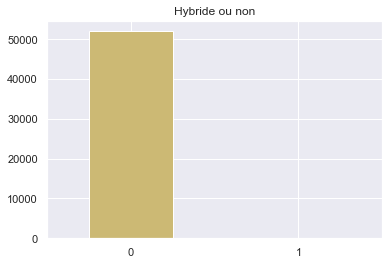

In [52]:
df.hybride.value_counts().plot(kind='bar',rot=0,title='Hybride ou non', color='y');

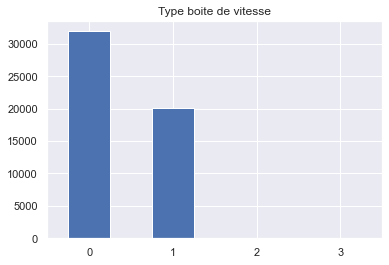

In [53]:
df.type_boite.value_counts().plot(kind='bar',rot=0,title='Type boite de vitesse', color='b');

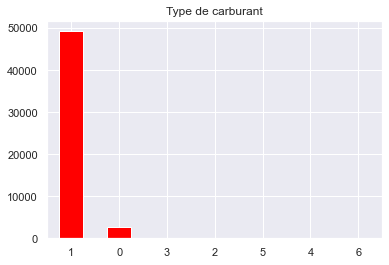

In [54]:
df.cod_cbr.value_counts().plot(kind='bar',rot=0,title='Type de carburant', color='red');

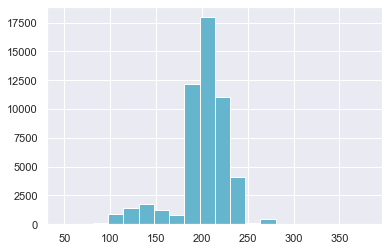

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(df.co2, bins=20, color='c');

In [56]:
# train test split

X=df_standard
y= df['conso_mixte']


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print('moyenne consommation mixte train : {0:.3f}'.format(np.mean(y_train)))
print('moyenne consommation mixte  test : {0:.3f}'.format(np.mean(y_test)))

moyenne consommation mixte train : 7.265
moyenne consommation mixte  test : 7.253


In [57]:
# on importe les classifieurs
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [58]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_test, y_test)


0.7981235637414904

In [59]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score



# une fonction pour évaluer un classifieur
def evaluate_method(clf, X, y):
    scores = cross_val_score(clf, X, y, cv=5)
    return max(scores)

print("évaluer regression lineare: ",evaluate_method(reg,X,y))



évaluer regression lineare:  0.7845181038935714


In [60]:
df['conso_mixte'].dtype

dtype('int64')

In [61]:
def evaluate_classifiers(clfs, names, X, y):
    scores = {}
    best = None
    best_score = 0
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

        
    print("CROSS VALIDATION OVER 5 FOLDS")
    print("==========================")

    for clf, name in zip(clfs, names):
        scores[clf] = cross_validate(clf, X_train, y_train, 
                                     return_train_score=True, cv=5,
                                     return_estimator=True)
        
        train_scores = scores[clf]["train_score"]
        valid_scores = scores[clf]["test_score"]
        test_scores = [est_clf.score(X_test, y_test) for est_clf in scores[clf]["estimator"]]

        print(name)
        print("\tTraining time mean: %.2f" % np.mean(scores[clf]["fit_time"]))
        print("\tTrain mean: %.2f" % np.mean(train_scores))
        print("\tValidation mean: %.2f" % np.mean(valid_scores))     
        print("\tTest: %.2f" % clf.fit(X_train, y_train).score(X_test, y_test))
        print()
        
        if(np.mean(valid_scores) > best_score):
            best_score = np.mean(valid_scores)
            best = clf
            best_name = name
    print("Best Classifier (according to validation): with mean score %.2f" % best_score)

In [62]:
#LogisticRegression et SVC prennenet bcp de temps pour évaluer le score

clfs = [DummyClassifier(strategy="stratified"),
        GaussianNB(), 
        LinearRegression(),
        RandomForestClassifier(),
        DecisionTreeClassifier(criterion="entropy")]

names = ["Dummy", "GaussianNB","LinearRegression" ,"RandomForest","DecisionTree"]
evaluate_classifiers(clfs, names, X, y)

CROSS VALIDATION OVER 5 FOLDS


C:\Users\ahmad\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Dummy
	Training time mean: 0.01
	Train mean: 0.35
	Validation mean: 0.35
	Test: 0.35



C:\Users\ahmad\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


KeyboardInterrupt: 

__Résultats pour conso_mixte__ :
* les deux meilleurs classifieurs sont `RandomForest` et `DecisionTree`avec score de 0.90 selon la valeur de la validtion, mais on voit que `DecisionTree` prend moins de temps. 

* tous les classifieurs sont meilleurs que le classifieur idiot `DummyClassifier`.

* `LinearRegression`, `DecisionTree` et `RandomForest` semblent obtenir les meilleurs résultats en test.

* On voit pas qu'il y a un overfitting dans les classifications

* `GaussianNB` est moins bon que les autres.

* On va utiliser GridSearch pour trouver les meuilleurs hyperparamètres

In [ ]:
from sklearn.model_selection import GridSearchCV

# hyperparam : profondeur et criterion
clfs_grid = [GridSearchCV(estimator=DummyClassifier(random_state=42),
                          param_grid={'strategy': ('stratified', 'most_frequent')}),
             
             GaussianNB(),
             
             LinearRegression(),
             
             GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), \
                          param_grid={'max_depth': np.arange(2,11), 
                                      'criterion':('gini', 'entropy')}),
             
             GridSearchCV(estimator=RandomForestClassifier(random_state=42), \
                          param_grid={'max_depth': np.concatenate((np.arange(2, 10), [None])), 
                                      'n_estimators': [10, 50, 100]}),
             ]

names = ["Dummy", "GaussianNB","LinearRegression" ,"DecisionTree","RandomForest"]


evaluate_classifiers(clfs_grid, names, X, y)

__Résultats apres avoir réglé des hyperparamètres pour conso_mixte__ :

 * Il y a une amélioration par rapport à `DummyClassifier` avec valeur de validation 0.43 (0.35 avant)
 * On n'a pas des résultas mieux sur `RandomForest` et ça pris bcp de temps (Training time mean: 57.73)
 * Il n'y a pas d'amélioration sur `DecisionTree` 


In [ ]:
# train test split
# CO2

X=df_standard
y1= df['co2']


from sklearn.model_selection import train_test_split

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y1, test_size=0.3, random_state=0)
print('moyenne consommation mixte train : {0:.3f}'.format(np.mean(y_train1)))
print('moyenne consommation mixte  test : {0:.3f}'.format(np.mean(y_test1)))

In [ ]:
#LogisticRegression et SVC prennenet bcp de temps pour évaluer le score

clfs = [DummyClassifier(strategy="stratified"),
        GaussianNB(), 
        LinearRegression(),
        RandomForestClassifier(),
        DecisionTreeClassifier(criterion="entropy")]

names = ["Dummy", "GaussianNB","LinearRegression" ,"RandomForest","DecisionTree"]

evaluate_classifiers(clfs, names, X, y1)

__Résultats pour CO2__ :
* le meilleur classifieur est `LinearRegression` avec score de 0.85 selon la valeur de la validtion.
* tous les classifieurs sont meilleurs que le classifieur idiot `DummyClassifier`.

* `LinearRegression`, `DecisionTree` et `RandomForest` semblent obtenir les meilleurs résultats en test.

* On voit pas qu'il a un overfitting dans les classifications

* `GaussianNB` est moins bon que les autres.

* On va utiliser GridSearch pour trouver les meuilleurs hyperparamètres

In [ ]:
from sklearn.model_selection import GridSearchCV

# hyperparam : profondeur et criterion
clfs_grid = [GridSearchCV(estimator=DummyClassifier(random_state=42),
                          param_grid={'strategy': ('stratified', 'most_frequent')}),
             
             GaussianNB(),
             
             LinearRegression(),
             
             GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), \
                          param_grid={'max_depth': np.arange(2,11), 
                                      'criterion':('gini', 'entropy')}),
             
             GridSearchCV(estimator=RandomForestClassifier(random_state=42), \
                          param_grid={'max_depth': np.concatenate((np.arange(2, 10), [None])), 
                                      'n_estimators': [10, 50, 100]}),
             ]

names = ["Dummy", "GaussianNB","LinearRegression" ,"DecisionTree","RandomForest"]

evaluate_classifiers(clfs_grid, names, X, y1)

__Résultats apres avoir réglé des hyperparamètres pour co2__ :

 * Il y a une petite amélioration par rapport à `DummyClassifier` avec valeur de validation 0.08 (0.03 avant)
 * On a le meême resultat pour `RandomForest` et ça pris bcp de temps (Training time mean: 135.99)
 * On a des resultats moins bon pour `DecisionTree` avec valeur de validation 0.61 (0.63 avant)


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

from sklearn.pipeline import make_pipeline

def ma_regression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

In [63]:
max_degree = 15
from sklearn.model_selection import validation_curve

In [64]:
from sklearn.model_selection import learning_curve

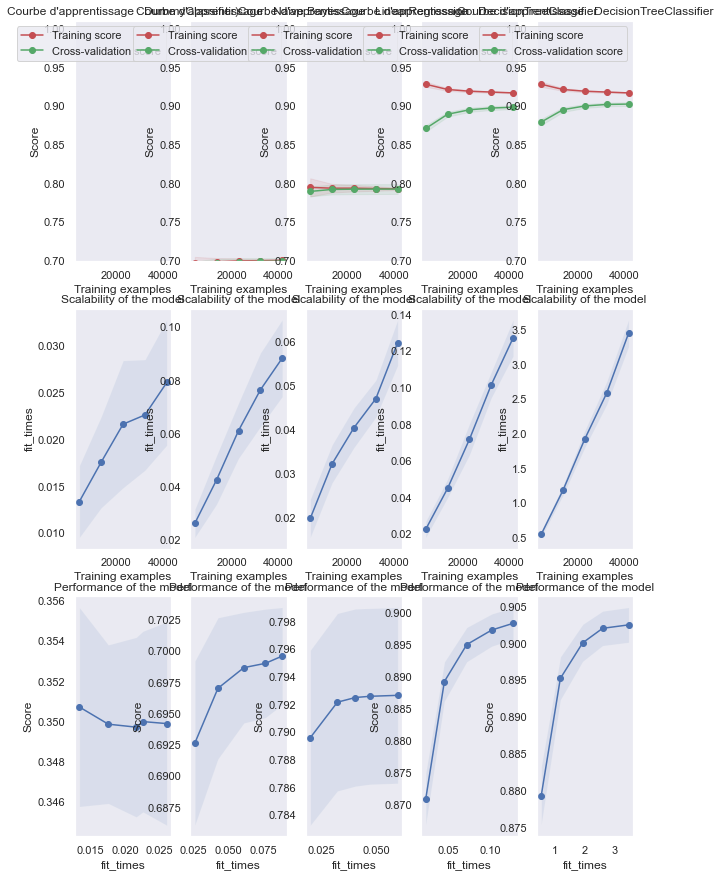

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


fig, axes = plt.subplots(3,5, figsize=(10, 15))

title = "Courbe d'apprentissage : DummyClassifier)"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = DummyClassifier(random_state=42)

plot_learning_curve(estimator, title, X, y, axes=axes[:, 0], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)


title = "Courbe d'apprentissage : Naive Bayes"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = GaussianNB()
plot_learning_curve(estimator, title, X, y, axes=axes[:, 1], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)
    
title = "Courbe d'apprentissage : LinearRegression"

cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = LinearRegression()
plot_learning_curve(estimator, title, X, y, axes=axes[:, 2], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)


title = "Courbe d'apprentissage : DecisionTreeClassifier"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = DecisionTreeClassifier(random_state=42)

plot_learning_curve(estimator, title, X, y, axes=axes[:, 3], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

title = "Courbe d'apprentissage : DecisionTreeClassifier"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = RandomForestClassifier(random_state=42)

plot_learning_curve(estimator, title, X, y, axes=axes[:, 4], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)


plt.show()